In [4]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math
from statsmodels.tsa.stattools import adfuller
# Вывод на экран текущей версии библиотеки matplotlib
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 3.3.4


In [31]:
def drawing_functions(funs,nrows, ncols):
    
    plt.figure(figsize=(4*len(funs), 4*len(funs)))
    i=0
    for fun in funs:
        i=i+1
        plt.subplot(nrows, ncols, i)
        for j in range(int(len(fun)/4)):
            x = np.linspace(fun[4*j+1], fun[4*j+2],fun[4*j+3])
            if(type(fun[4*j+0])==type([])):
                plt.plot(fun[4*j+0])
            else:
                plt.plot(x, fun[4*j+0](x))
            
def getRand(N,min,max):
    a = 34
    c = 23
    m = 167
    seed=round(time.time() %10)
    
    array=[]
    for j in range(N):
        seed = ((a * seed ) + c) % m;
        array.append((seed/(m-1))*(max-min)+min)
    return(array)
def embedRandom(N,min,max):
    array=[]
    for j in range(N):
        array.append(random.random()*(max-min)+min)
    return(array)
def selfRandom(N,min,max):
    array=getRand(N,min,max)
    return(array)        
def sum_graphs(fir,sec):
    array=[]
    if(type(fir)==type([])):
        for j in range(len(sec)):
            temp=fir[j]+sec[j]
            array.append(temp)
    else:
        for j in range(len(sec)):
            temp=fir(j)+sec[j]
            array.append(temp)
    return array
def multiplication_graphs(fir,sec):
    array=[]
    if(type(fir)==type([])):
        for j in range(len(sec)):
            temp=fir[j]*sec[j]
            array.append(temp)
    else:
        for j in range(len(sec)):
            temp=fir(j)*sec[j]
            array.append(temp)
    return array
def bias(fir, number):
    sec=[number]*len(fir)
    return sum_graphs(fir,sec)
def bias_lambda(fir, number, size):
    sec=[number]*size
    return sum_graphs(fir,sec)
def Shift(fir, number, size):
    return bias_lambda(fir, number, size)
def antiSpike(fun1):
    for i in range(len(fun1)-1):
        if(abs(fun1[i+1]/fun1[i])>40):
            fun1[i+1]=(fun1[i]+fun1[i+2])/2
    return fun1

In [6]:
##analys
def averVal(array):
    return sum(array)/len(array)
def var(array):
    return np.var(array)
def standard_deviation(array):
    return math.sqrt(var(array))
def middle_square(array):
    temp=0
    for j in range(len(array)):
        temp=temp+array[j]*array[j]
    temp=temp/len(array)
    return math.sqrt(temp)
def asymmetry(array):
    temp=0
    aver=averVal(array)
    for j in range(len(array)):
        temp=temp+((array[j]-aver)**3)
    temp=temp/len(array)
    return temp
def coefficient_asymmetry(array):
    return asymmetry(array)/(standard_deviation(array)**3)
def excess(array):
    temp=0
    aver=averVal(array)
    for j in range(len(array)):
        temp=temp+((array[j]-aver)**4)
    temp=temp/len(array)
    return temp
def coefficient_excess(array):
    return excess(array)/(standard_deviation(array)**4)-3
def statistics_output(array):
    print("Минимальное число: "+str(min(array)) )
    print("Максимальное число: "+str(max(array)) )
    print("Cреднее число: "+str(averVal(array)) )
    print("Дисперсия: "+str(var(array)) )
    print("Стандартное отклонение: "+str(standard_deviation(array)) )
    print("Cреднее квадратичное отклонение: "+str(middle_square(array)) )
    print("Ассиметр: "+str(asymmetry(array)) )
    print("Коэфицент ассиметрии: "+str(coefficient_asymmetry(array)) )
    print("Эксцесс: "+str(excess(array)) )
    print("Коэфицент эксцессии: "+str(coefficient_excess(array)) )
def statistics_output_help():
    print("Минимальное число: "+"min(array)")
    print("Максимальное число: "+"max(array)" )
    print("Cреднее число: "+"averVal(array)" )
    print("Дисперсия: "+"var(array)" )
    print("Стандартное отклонение: "+"standard_deviation(array)" )
    print("Cреднее квадратичное отклонение: "+"middle_square(array)")
    print("Ассиметр: "+"asymmetry(array)" )
    print("Коэфицент ассиметрии: "+"coefficient_asymmetry(array)" )
    print("Эксцесс: "+"excess(array)")
    print("Коэфицент эксцессии: "+"coefficient_excess(array)")
def stationarity(funs):
    result = adfuller(funs)
    print('adf: '+str(result[0])) 
    print('p-value: '+str(result[1]))
    print('Critical values: '+str(result[4]))
    if result[0]> result[4]['10%']: 
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')
def stationarity_rough(array):
    X = array
    split = int(len(X) / 2)
    X1 = X[0:split]
    X2 = X[split:]
    mean1, mean2 = averVal(X1), averVal(X2)
    var1, var2 = var(X1), var(X2)
    print('mean1='+str(mean1)+', mean2='+str(mean2))
    print('variance1='+str(var1)+', variance2='+str(var2))
def stationarity_var(funs):
    X = funs
    y=[]
    split = int(len(X) / 10)
    for j in range(9):
        y.append(X[split*j:split*(j+1)])
    y.append(X[split*9:])
    bool2=True
    #Проверка по мат. ожиданию
    aver=averVal(y[0])
    for j in range(9):
        if(abs(aver-averVal(y[j+1]))/aver>0.1):
            bool2=False
    #Проверка по дисперсии
    aver=var(y[0])
    for j in range(9):
        if(abs(aver-var(y[j+1]))/aver>0.1):
            bool2=False
    
    if (bool2): 
        print('Стационарен по мат. ожиданию и дисперсии')
    else:
        print('Не стационарен по мат. ожиданию и дисперсии')
def stationarity_rough(array,size):
    X = array
    split = int(len(X) / 2)
    X1 = X[0:split]
    X2 = X[split:]
    mean1, mean2 = averVal(X1), averVal(X2)
    var1, var2 = var(X1), var(X2)
    print('mean1='+str(mean1)+', mean2='+str(mean2))
    print('variance1='+str(var1)+', variance2='+str(var2))
    n, bins, patches = plt.hist(array, size, density=True, facecolor='g')
    plt.xlim(min(array), max(array))
    plt.ylim(0, max(n))
    plt.grid(True)
    plt.show()
    
def Rakf(L,fun):
    res=0
    aver=averVal(fun)
    for k in range(len(fun)-L):
        res=res+(fun[k]-aver)*(fun[k+L]-aver)
    temp=0
    for k in range(len(fun)):
        temp=temp+(fun[k]-aver)**2
    res=res/temp
    return res
def Rak(L,fun):
    res=0
    aver=averVal(fun)
    for k in range(len(fun)-L):
        res=res+(fun[k]-aver)*(fun[k+L]-aver)
    res=res/len(fun)
    return res
def Rk(L,fun1,fun2):
    res=0
    aver1=averVal(fun1)
    aver2=averVal(fun2)
    for k in range(len(fun1)-L):
        res=res+(fun1[k]-aver1)*(fun2[k+L]-aver2)
    res=res/len(fun1)
    return res

In [4]:
array=embedRandom(150,-1,1)
stationarity_var(array)

Не стационарен по мат. ожиданию и дисперсии


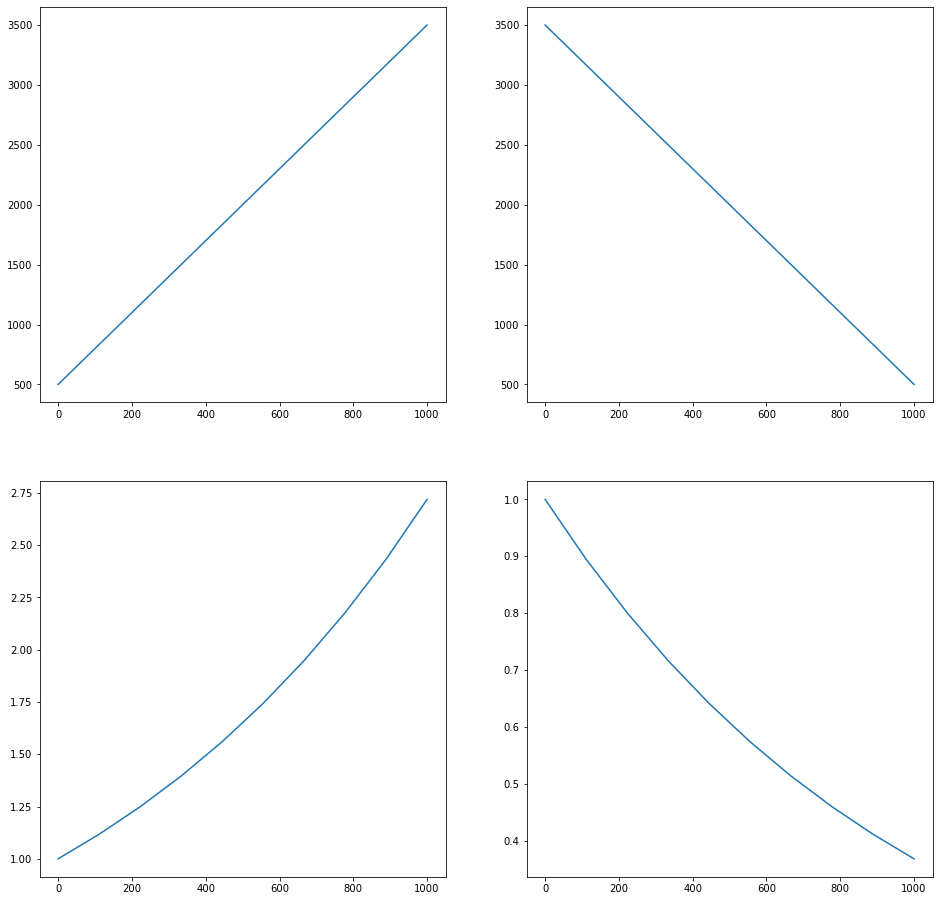

In [5]:
# 1 задание
funs=np.array([[lambda x: 3*x+500, 0, 1000,10],
               [lambda x: -3*x+3500, 0, 1000,10],
               [lambda x: 1*np.exp(0.001*x),0, 1000,10],
               [lambda x: 1*np.exp(-0.001*x),0, 1000,10]])
drawing_functions(funs,2,2)


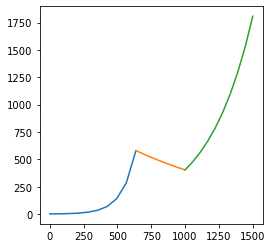

In [6]:
funs=np.array([[lambda x: 1*np.exp(0.01*x), 0, 636,10,
                lambda x: 1*np.exp(7-0.001*x), 636, 1000,10,
                lambda x: 1*np.exp(3+0.003*x), 1000, 1500,10]])
drawing_functions(funs,1,1)

<ipython-input-7-0a4c819e012e>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[array, 0, 150,1]])


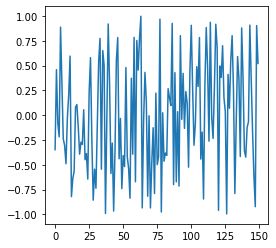

In [7]:
#2 задание
array=embedRandom(150,-1,1)
funs=np.array([[array, 0, 150,1]])
drawing_functions(funs,1,1)

<ipython-input-8-1a2f49409e00>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[array, 0, 150,1]])


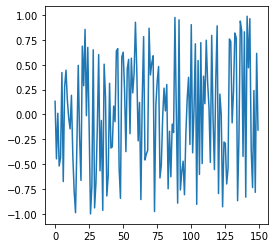

In [8]:
array=selfRandom(150,-1,1)
funs=np.array([[array, 0, 150,1]])
drawing_functions(funs,1,1)

<ipython-input-9-1e2d3d92dd92>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[sum_graphs(fir,sec), 0, 50,1]])
<ipython-input-9-1e2d3d92dd92>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[sum_graphs(fir,sec), 0, 50,1]])


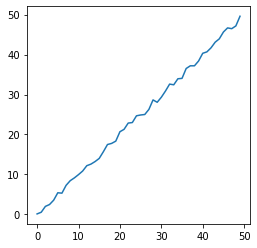

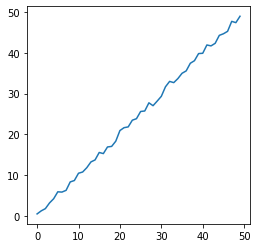

In [9]:
#свой рандом + x
sec=selfRandom(50,-1,1)
fir = lambda x: 1*x

funs=np.array([[sum_graphs(fir,sec), 0, 50,1]])
drawing_functions(funs,1,1)
#чужой рандом+х
sec=embedRandom(50,-1,1)
fir = lambda x: 1*x

funs=np.array([[sum_graphs(fir,sec), 0, 50,1]])
drawing_functions(funs,1,1)


<ipython-input-10-0b1ddaade717>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[array, 0, 50,1]])
<ipython-input-10-0b1ddaade717>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[array, 0, 50,1]])


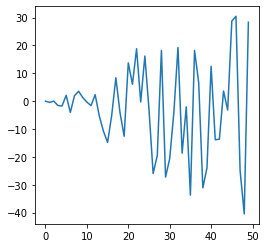

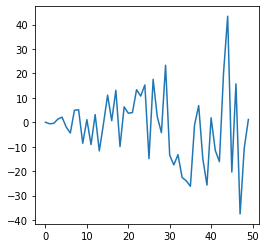

In [10]:
#умножение рандома на х
#свой рандом
array2=selfRandom(50,-1,1)
array=[]
xx = lambda x: 1*x
for j in range(50):
    xxx=xx(j)*array2[j]
    array.append(xxx)
funs=np.array([[array, 0, 50,1]])
drawing_functions(funs,1,1)

#чужой рандом
array2=embedRandom(50,-1,1)
array=[]
xx = lambda x: 1*x
for j in range(50):
    xxx=xx(j)*array2[j]
    array.append(xxx)
funs=np.array([[array, 0, 50,1]])
drawing_functions(funs,1,1)

mean1=1248.5, mean2=2748.5
variance1=187499.25, variance2=187499.25


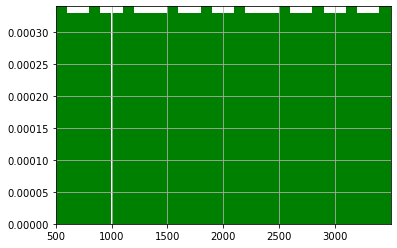

Не стационарен по мат. ожиданию и дисперсии
adf: 18.0449286131089
p-value: 1.0
Critical values: {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}
есть единичные корни, ряд не стационарен
Минимальное число: 500
Максимальное число: 3497
Cреднее число: 1998.5
Дисперсия: 749999.25
Стандартное отклонение: 866.0249707716285
Cреднее квадратичное отклонение: 2178.072886751038
Ассиметр: 0.0
Коэфицент ассиметрии: 0.0
Эксцесс: 1012496625002.3514
Коэфицент эксцессии: -1.20000240000242


<ipython-input-11-9f140471a94a>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 1000,1]])


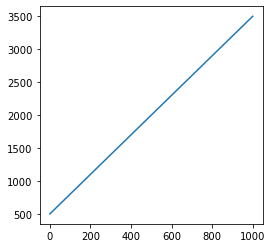

In [11]:
#3 задание
# доказательство что график y=x стационарен или не стационарен
# 
fir = lambda x: 3*x+500
sec=[0]*1000
funs=sum_graphs(fir,sec)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 1000,1]])
drawing_functions(funs2,1,1)

mean1=2751.5, mean2=1251.5
variance1=187499.25, variance2=187499.25


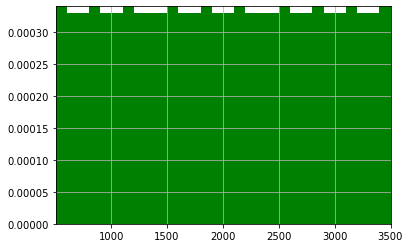

Не стационарен по мат. ожиданию и дисперсии
adf: 10.307410794035986
p-value: 1.0
Critical values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}
есть единичные корни, ряд не стационарен
Минимальное число: 503
Максимальное число: 3500
Cреднее число: 2001.5
Дисперсия: 749999.25
Стандартное отклонение: 866.0249707716285
Cреднее квадратичное отклонение: 2180.825875671875
Ассиметр: 0.0
Коэфицент ассиметрии: 0.0
Эксцесс: 1012496625002.3514
Коэфицент эксцессии: -1.20000240000242


D:\Programm\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
<ipython-input-12-20d4480c3392>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 1000,1]])


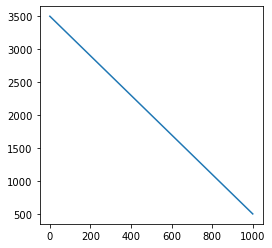

In [12]:


fir = lambda x: -3*x+3500
sec=[0]*1000
funs=sum_graphs(fir,sec)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 1000,1]])
drawing_functions(funs2,1,1)

mean1=1.2967939282497651, mean2=2.138051733220166
variance1=0.03488962704569786, variance2=0.09483983920003373


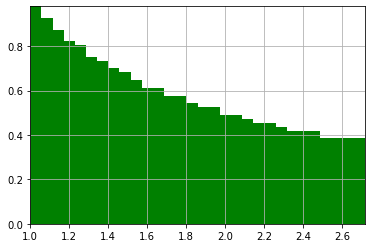

Не стационарен по мат. ожиданию и дисперсии
adf: 123615652720720.42
p-value: 1.0
Critical values: {'1%': -3.437013049776705, '5%': -2.864481711583566, '10%': -2.5683363157264196}
есть единичные корни, ряд не стационарен
Минимальное число: 1.0
Максимальное число: 2.715564905318567
Cреднее число: 1.7174228307349666
Дисперсия: 0.24179340672876934
Стандартное отклонение: 0.4917249299443433
Cреднее квадратичное отклонение: 1.7864306833063726
Ассиметр: 0.04091373095570318
Коэфицент ассиметрии: 0.34411404887068386
Эксцесс: 0.11282076652609326
Коэфицент эксцессии: -1.070254052548515


<ipython-input-13-7bce30a22c02>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 1000,1]])


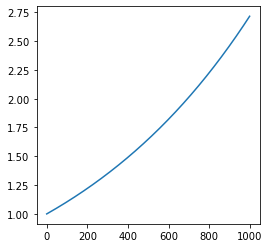

In [13]:


fir = lambda x: 1*np.exp(0.001*x)
sec=[0]*1000
funs=sum_graphs(fir,sec)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 1000,1]])
drawing_functions(funs2,1,1)

mean1=0.7873322154932425, mean2=0.4775411280761259
variance1=0.012860872540727002, variance2=0.004731250603259797


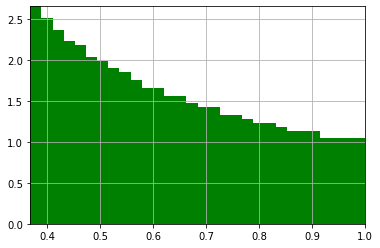

Не стационарен по мат. ожиданию и дисперсии
adf: -136778971029172.39
p-value: 0.0
Critical values: {'1%': -3.4370266558635914, '5%': -2.864487711945291, '10%': -2.5683395116993872}
единичных корней нет, ряд стационарен
Минимальное число: 0.3682475046136629
Максимальное число: 1.0
Cреднее число: 0.6324366717846854
Дисперсия: 0.032788691032763356
Стандартное отклонение: 0.18107647840833263
Cреднее квадратичное отклонение: 0.6578486412928521
Ассиметр: 0.0020430948199962385
Коэфицент ассиметрии: 0.3441140488706702
Эксцесс: 0.0020746665096563147
Коэфицент эксцессии: -1.0702540525485245


<ipython-input-14-d6a19226916e>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 1000,1]])


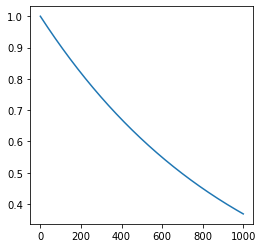

In [14]:


fir = lambda x: 1*np.exp(-0.001*x)
sec=[0]*1000
funs=sum_graphs(fir,sec)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 1000,1]])
drawing_functions(funs2,1,1)

mean1=-0.008915525142580146, mean2=-0.012440227479007313
variance1=0.33362218812446476, variance2=0.33693153778714013


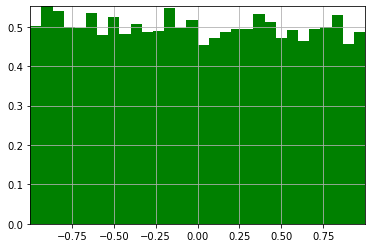

Стационарен по мат. ожиданию и дисперсии
adf: -101.18305139871502
p-value: 0.0
Critical values: {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}
единичных корней нет, ряд стационарен
Минимальное число: -0.9999000856047557
Максимальное число: 0.9999183972852699
Cреднее число: -0.01067787631079373
Дисперсия: 0.33527996883744254
Стандартное отклонение: 0.5790336508679289
Cреднее квадратичное отклонение: 0.5791320970900762
Ассиметр: 0.0038130878795461626
Коэфицент ассиметрии: 0.0196410817518698
Эксцесс: 0.20152202122163215
Коэфицент эксцессии: -1.2073013333475098


<ipython-input-15-43824727b006>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 10000,1]])


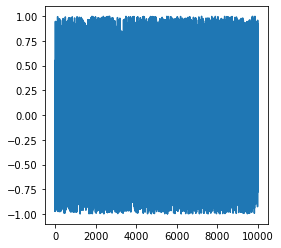

In [15]:

funs=embedRandom(10000,-1,1)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 10000,1]])
drawing_functions(funs2,1,1)

mean1=-0.004313253012048189, mean2=-0.0041566265060240925
variance1=0.336447356074902, variance2=0.33634913267527944


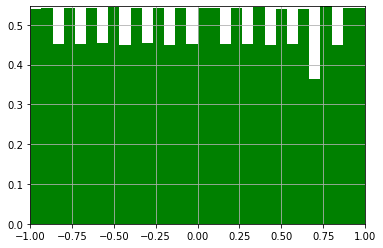

Стационарен по мат. ожиданию и дисперсии
adf: -19.220231808581456
p-value: 0.0
Critical values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}
единичных корней нет, ряд стационарен
Минимальное число: -1.0
Максимальное число: 1.0
Cреднее число: -0.004234939759036139
Дисперсия: 0.33639825050805633
Стандартное отклонение: 0.579998491815329
Cреднее квадратичное отклонение: 0.5800139526104724
Ассиметр: 0.0022864492682034315
Коэфицент ассиметрии: 0.011718741567840467
Эксцесс: 0.2045773084051766
Коэфицент эксцессии: -1.1922015764988994


<ipython-input-16-8d3d0807c10b>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs2=np.array([[funs, 0, 10000,1]])


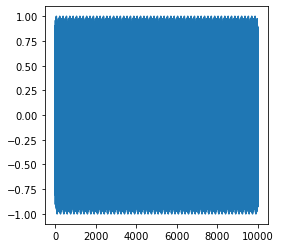

In [16]:
funs=selfRandom(10000,-1,1)
# Грубая проверка, чекается мат ожидание, дисперсия, смотрится гистограмма (среднее значение и дисперсия постоянно во времени,)
stationarity_rough(funs,30)
# Проверка по мат ожиданию
stationarity_var(funs)
# Дополненный тест Дики-Фуллера
stationarity(funs)
#statistics_output_help()
statistics_output(funs)
funs2=np.array([[funs, 0, 10000,1]])
drawing_functions(funs2,1,1)

In [17]:
# 4 задание

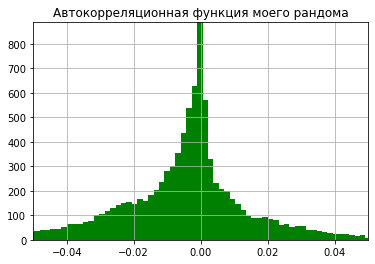

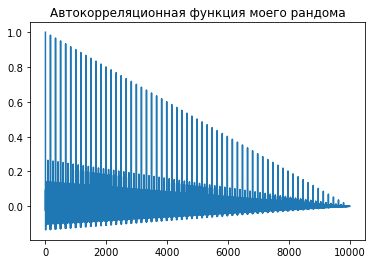

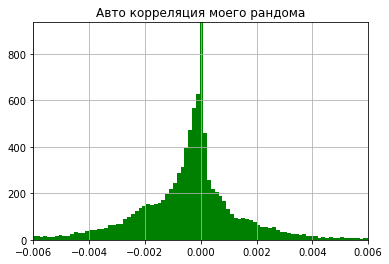

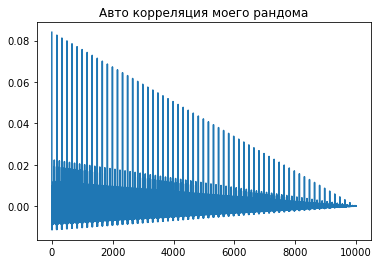

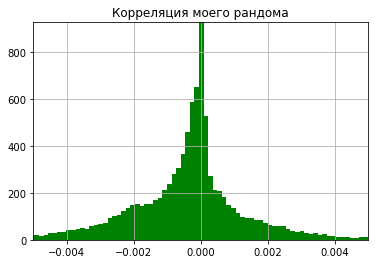

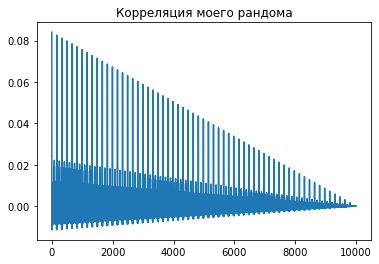

In [18]:
N=10000
M=700
funs=selfRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rakf(j,funs))
n, bins, patches = plt.hist(array, M, density=False, facecolor='g')
plt.xlim(-0.05,  0.05)
plt.title("Автокорреляционная функция моего рандома")
plt.ylim(0, max(n))
plt.grid(True)
plt.show()
plt.title("Автокорреляционная функция моего рандома")
plt.plot(array)
plt.show() 
funs=selfRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rak(j,funs))
n, bins, patches = plt.hist(array, M, density=False, facecolor='g')
plt.xlim(-0.006, 0.006)
plt.title("Авто корреляция моего рандома")
plt.ylim(0, max(n))
plt.grid(True)
plt.show()
plt.title("Авто корреляция моего рандома")
plt.plot(array)
plt.show()
fun1=selfRandom(N,0,1)
fun2=selfRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rk(j,fun1,fun2))
n, bins, patches = plt.hist(array, M, density=False, facecolor='g')
plt.xlim(-0.005, 0.005)
plt.title("Корреляция моего рандома")
plt.ylim(0, max(n))
plt.grid(True)
plt.show()
plt.title("Корреляция моего рандома")
plt.plot(array)
plt.show()


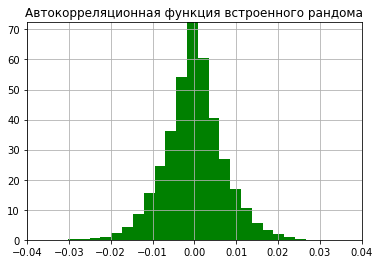

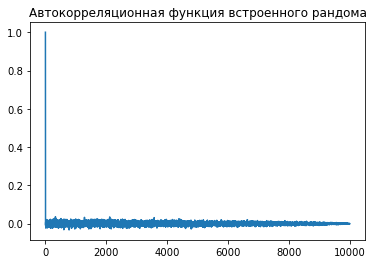

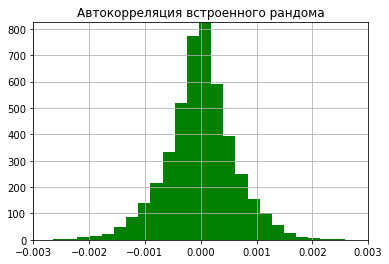

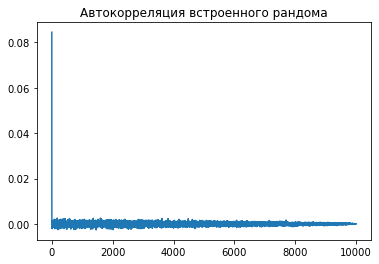

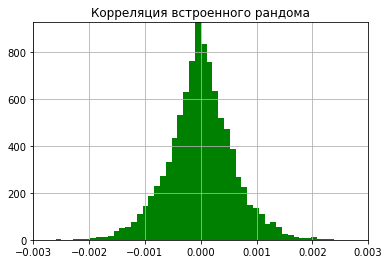

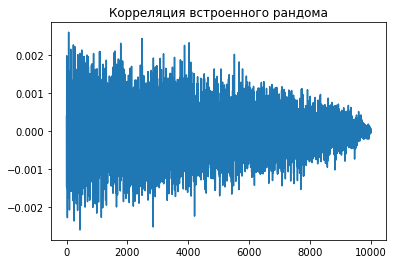

In [19]:
N=10000
M=400
funs=embedRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rakf(j,funs))
n, bins, patches = plt.hist(array, M, density=True, facecolor='g')
plt.xlim(-0.04,  0.04)
plt.title("Автокорреляционная функция встроенного рандома")
plt.ylim(0, max(n))
plt.grid(True)
plt.show()
plt.title("Автокорреляционная функция встроенного рандома")
plt.plot(array)
plt.show()

funs=embedRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rak(j,funs))
n, bins, patches = plt.hist(array, M, density=True, facecolor='g')
plt.xlim(-0.003, 0.003)
plt.title("Автокорреляция встроенного рандома")
plt.ylim(0, max(n))
plt.grid(True)
plt.show()
plt.title("Автокорреляция встроенного рандома")
plt.plot(array)
plt.show()

M=50
fun1=embedRandom(N,0,1)
fun2=embedRandom(N,0,1)
array=[]
for j in range(len(funs)):
    array.append(Rk(j,fun1,fun2))
n, bins, patches = plt.hist(array, M, density=True, facecolor='g')
plt.xlim(-0.003, 0.003)
plt.ylim(0, max(n))
plt.title("Корреляция встроенного рандома")
plt.grid(True)
plt.show()
plt.title("Корреляция встроенного рандома")
plt.plot(array)
plt.show()



In [20]:
#5 задание

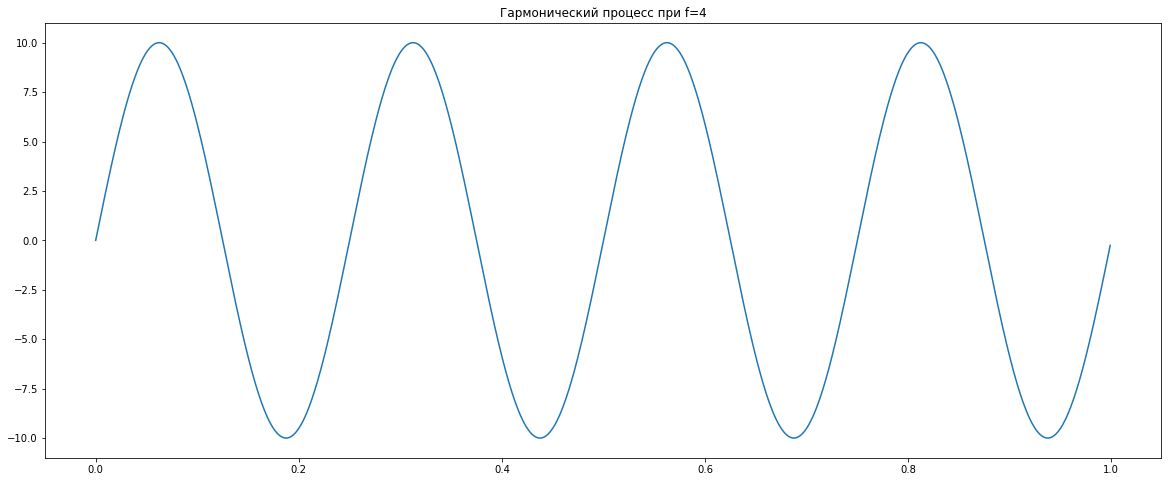

In [37]:
f=4
t=1/(f*32)
T=t*1000
fun=lambda x: 10*np.sin(2*np.pi*f*x)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс при f=4")
plt.plot(x, fun(x))


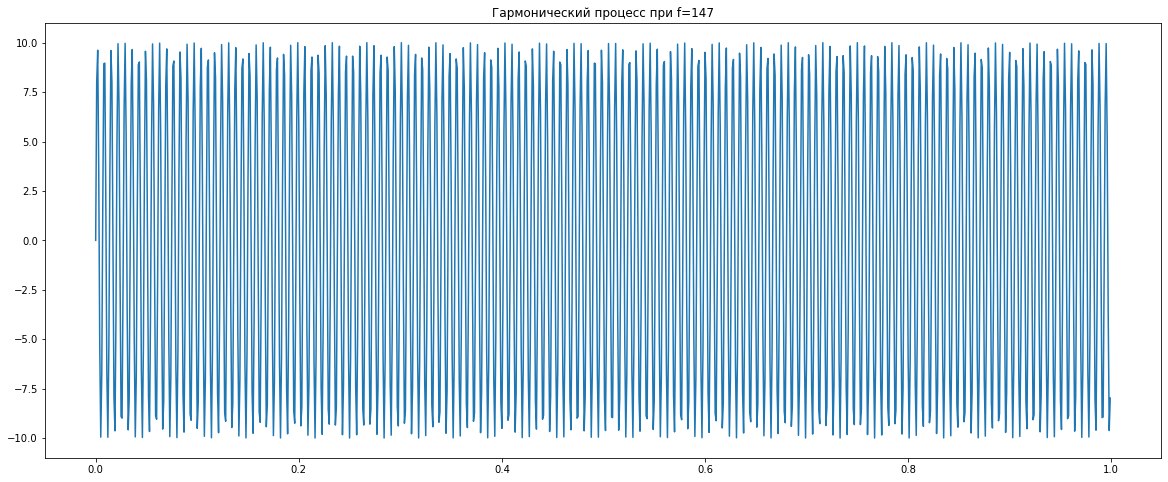

In [38]:
f=147
t=1/(f*32)
T=t*1000
fun=lambda x: 10*np.sin(2*np.pi*f*x)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс при f=147")
plt.plot(x, fun(x))


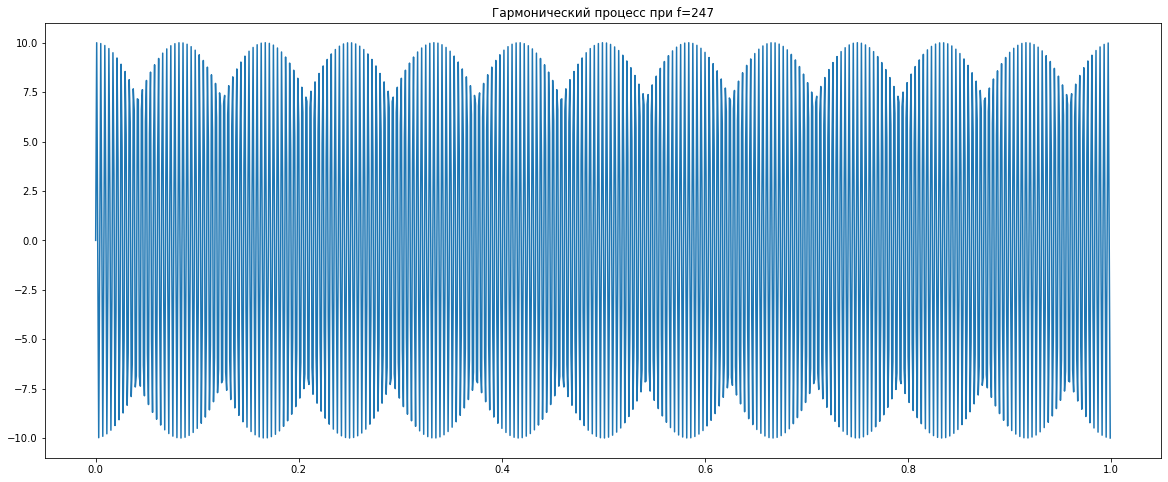

In [39]:
f=247
t=1/(f*32)
T=t*1000
fun=lambda x: 10*np.sin(2*np.pi*f*x)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс при f=247")
plt.plot(x, fun(x))


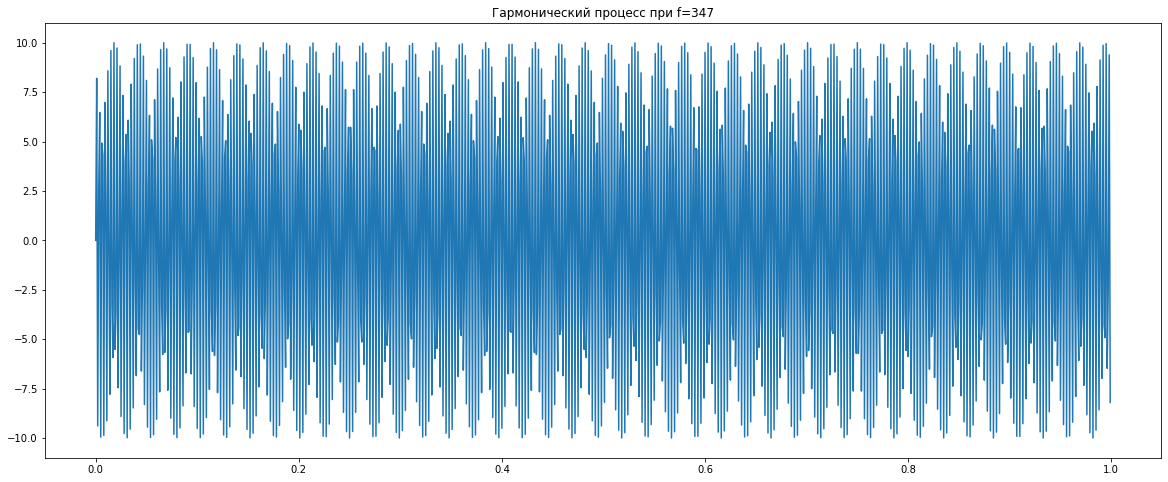

In [40]:
f=347
t=1/(f*32)
T=t*1000
fun=lambda x: 10*np.sin(2*np.pi*f*x)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс при f=347")
plt.plot(x, fun(x))


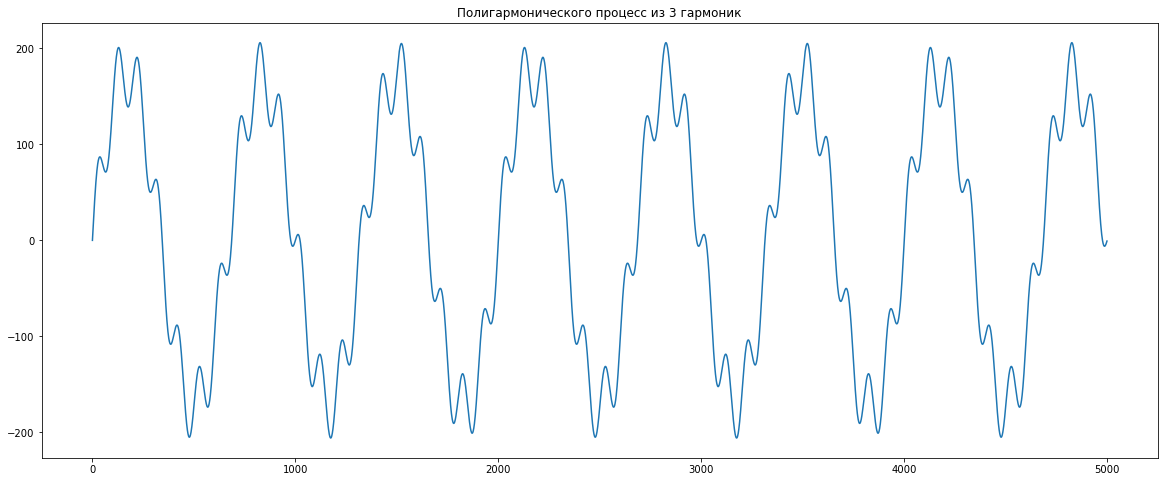

In [43]:
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun=lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
x = np.arange(0.0, 5000,1)
plt.figure(figsize=(20, 8))
plt.title("Полигармонического процесс из 3 гармоник")
plt.plot(x, fun(x))


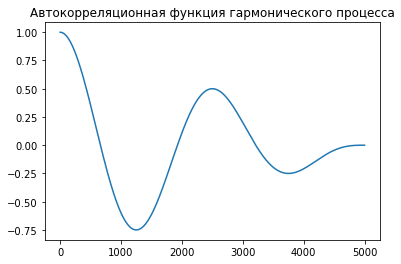

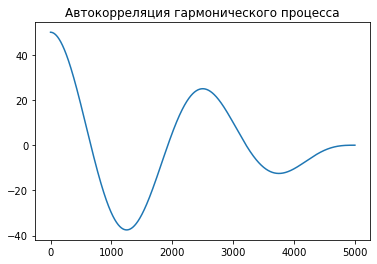

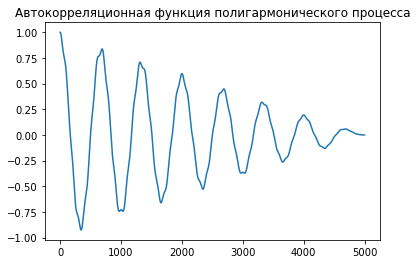

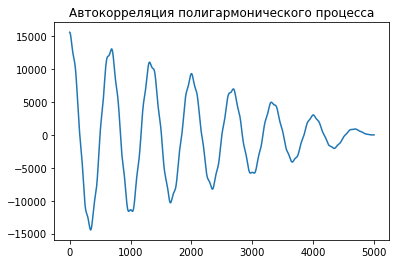

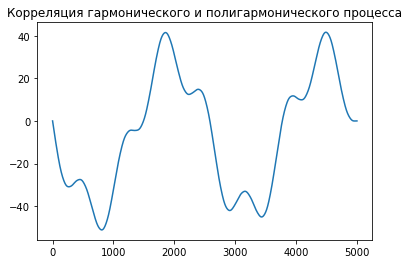

In [42]:
f=4
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun1=lambda x: 10*np.sin(2*np.pi*f*x*t)
sec=[0]*5000
fun1=sum_graphs(fun1,sec)


fun2=lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
sec=[0]*5000
fun2=sum_graphs(fun2,sec)

array=[]
for j in range(len(fun1)):
    array.append(Rakf(j,fun1))

plt.title("Автокорреляционная функция гармонического процесса")
plt.plot(array)
plt.show()

array=[]
for j in range(len(fun1)):
    array.append(Rak(j,fun1))

plt.title("Автокорреляция гармонического процесса")
plt.plot(array)
plt.show()





array=[]
for j in range(len(fun2)):
    array.append(Rakf(j,fun2))

plt.title("Автокорреляционная функция полигармонического процесса")
plt.plot(array)
plt.show()

array=[]
for j in range(len(fun2)):
    array.append(Rak(j,fun2))

plt.plot(array)
plt.title("Автокорреляция полигармонического процесса")
plt.show()
array=[]
for j in range(len(fun1)):
    array.append(Rk(j,fun1,fun2))

plt.title("Корреляция гармонического и полигармонического процесса")
plt.plot(array)
plt.show()

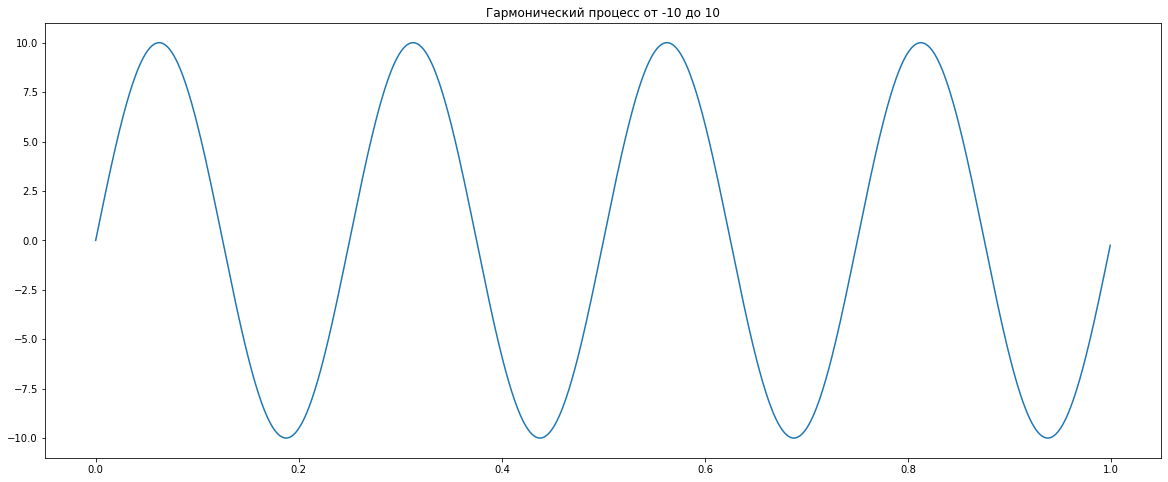

In [45]:
f=4
t=1/(f*32)
t=0.0001
T=t*1000
fun=lambda x: 10*np.sin(2*np.pi*f*x)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс от -10 до 10")
plt.plot(x, fun(x))

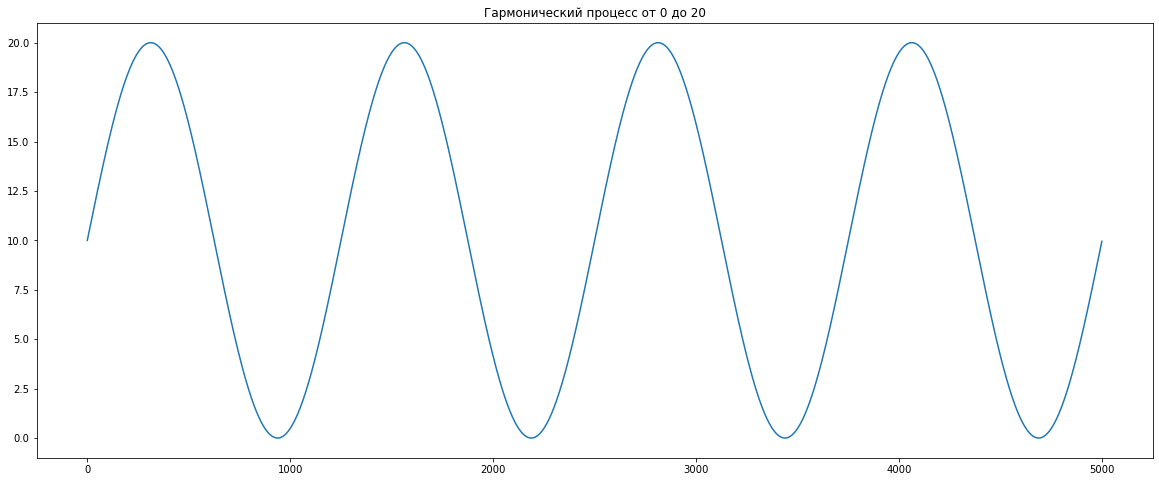

In [47]:


f=4
t=1/(f*32)
t=0.0002
T=t*1000
fir=lambda x: 10*np.sin(2*np.pi*f*x*t)
fun=Shift(fir,10,5000)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.title("Гармонический процесс от 0 до 20")
plt.plot(fun)

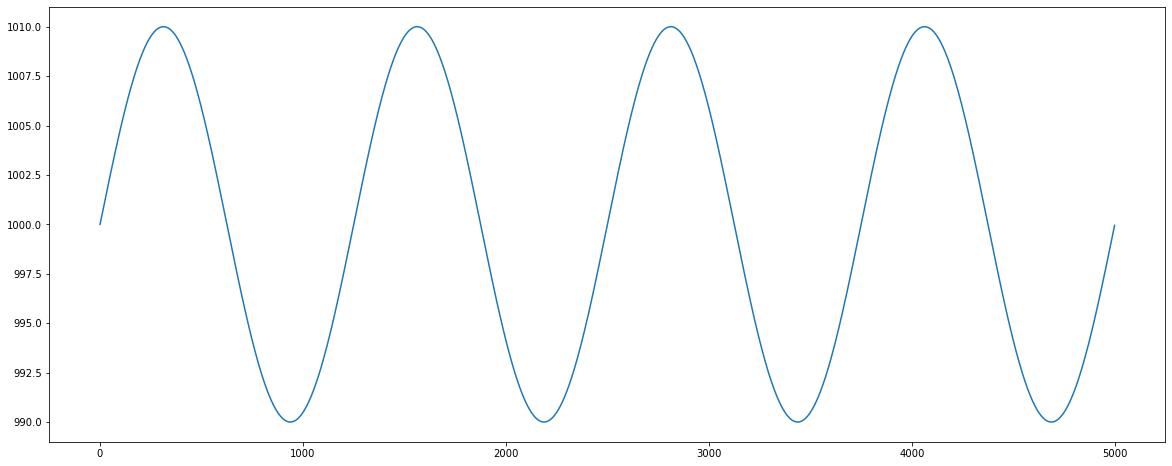

In [29]:

f=4
t=1/(f*32)
t=0.0002
T=t*1000
fir=lambda x: 10*np.sin(2*np.pi*f*x*t)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.plot(bias_lambda(fir,1000,5000))

От 0 до n сгенерировать неправдоподобные значения. Внесение в данные каких то случайных данных превышающих диапозон (на порядок)
спайс функция
1. на интервале н нужно сгенерировать больше 1 и меньше 5. 5 неправдоподобных значений.
2. Их местоположение случайно. 
3. Их значение случайно
-100 до 100 выбросы (диапозон выброса от -10000 до 10000)
4. знак случайный (либо +, либо -)

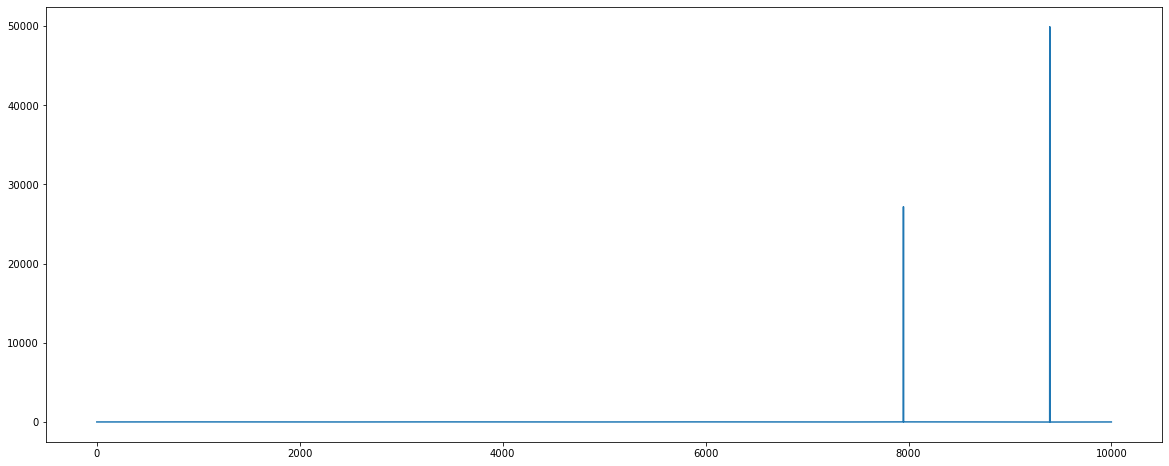

In [23]:
def spice(size,minN,maxN, minS,maxS):
    number_blowout=round(embedRandom(1,minN,maxN)[0])
    array=[0]*size
    for i in range(number_blowout):
        if(round(embedRandom(1,0,1)[0])==0):
            array[round(embedRandom(1,0,len(array))[0])]=round(embedRandom(1,minS,maxS)[0])
        else:
            array[round(embedRandom(1,0,len(array))[0])]=round(embedRandom(1,minS,maxS)[0])*-1
    return array



f=4
t=0.0001
fun1=lambda x: 10*np.sin(2*np.pi*f*x*t)
sec=spice(10000,1,5,10000,50000)
fun1=sum_graphs(fun1,sec)
plt.figure(figsize=(20, 8))
plt.plot(fun1)

In [ ]:
round(embedRandom(1,0,1)[0])

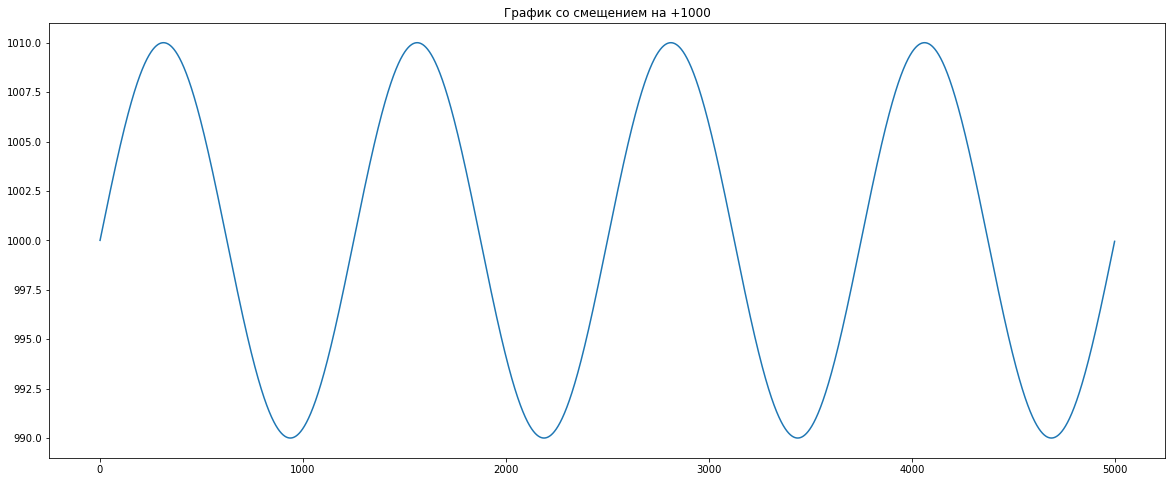

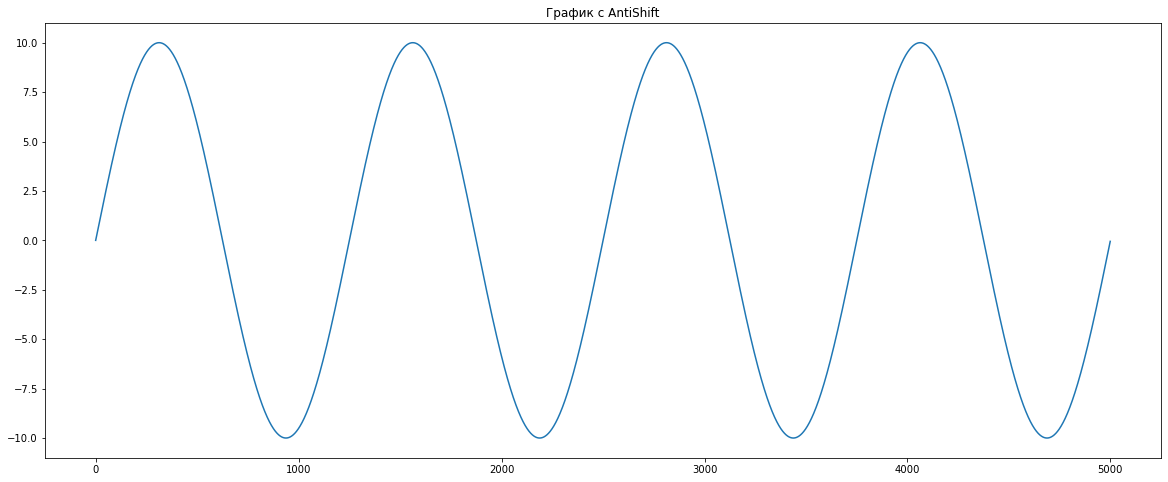

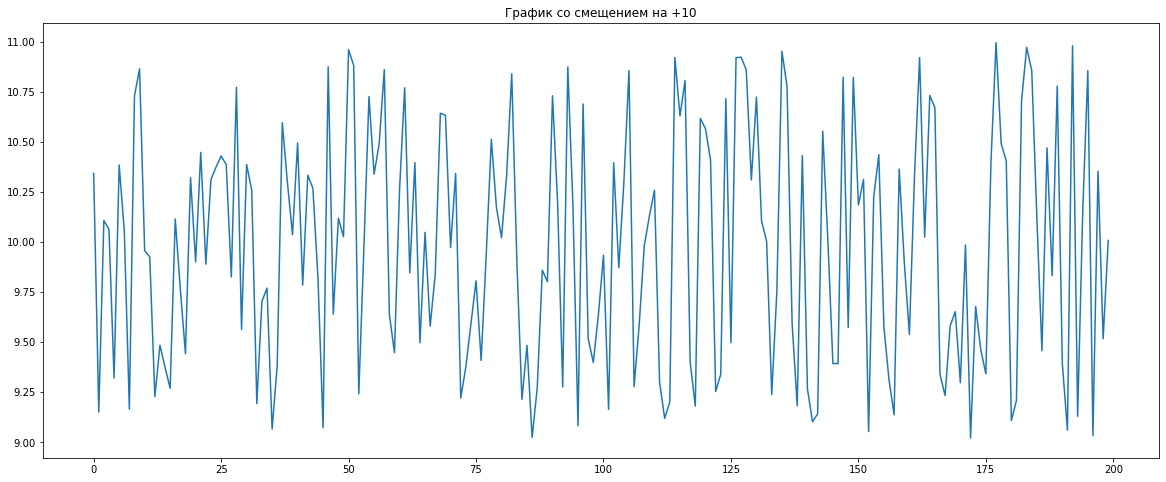

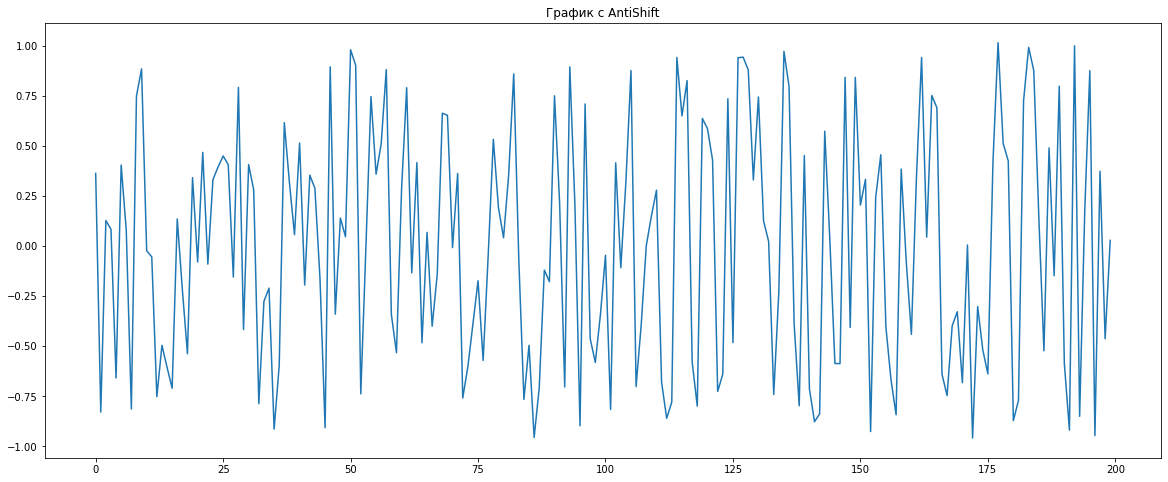

In [21]:

f=4
t=1/(f*32)
t=0.0002
T=t*1000
fir=lambda x: 10*np.sin(2*np.pi*f*x*t)
fun=bias_lambda(fir,1000,5000)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.plot(bias_lambda(fir,1000,5000))
plt.title("График со смещением на +1000")
plt.show()
def AntiShift(fun):
    tmp=[averVal(fun)*-1]*len(fun)
    return sum_graphs(fun,tmp)
plt.figure(figsize=(20, 8))
plt.plot(AntiShift(fun))
plt.title("График с AntiShift")
plt.show()


fir=Shift(embedRandom(200,-1,1),10,200)

fun=fir
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.plot(fun)
plt.title("График со смещением на +10")
plt.show()
def AntiShift(fun):
    tmp=[averVal(fun)*-1]*len(fun)
    return sum_graphs(fun,tmp)
plt.figure(figsize=(20, 8))
plt.plot(AntiShift(fun))
plt.title("График с AntiShift")
plt.show()

Задания за прошлую пару, 20.10

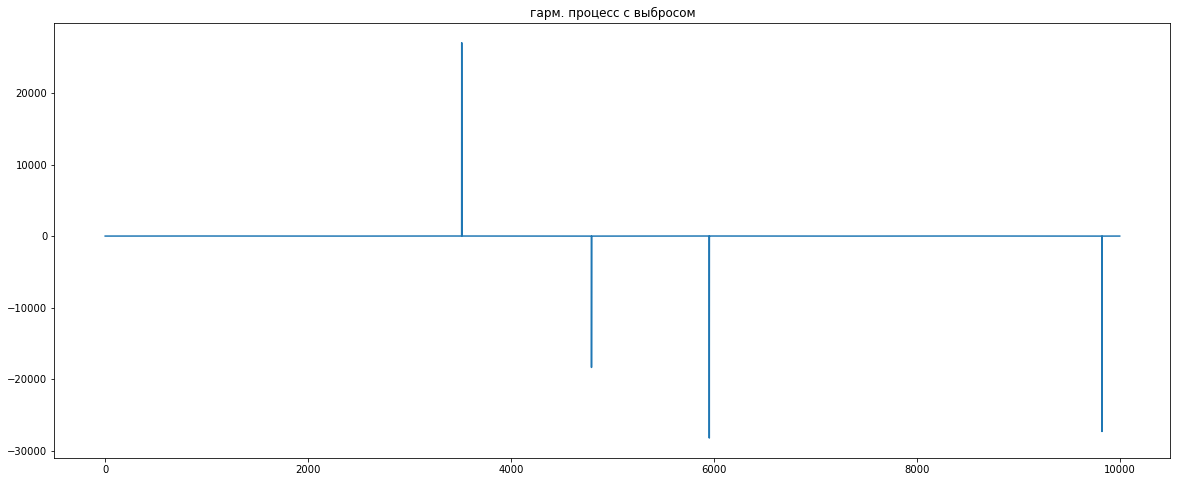

<ipython-input-31-9f7f47dcbfbc>:66: RuntimeWarning: divide by zero encountered in double_scalars
  if(abs(fun1[i+1]/fun1[i])>40):


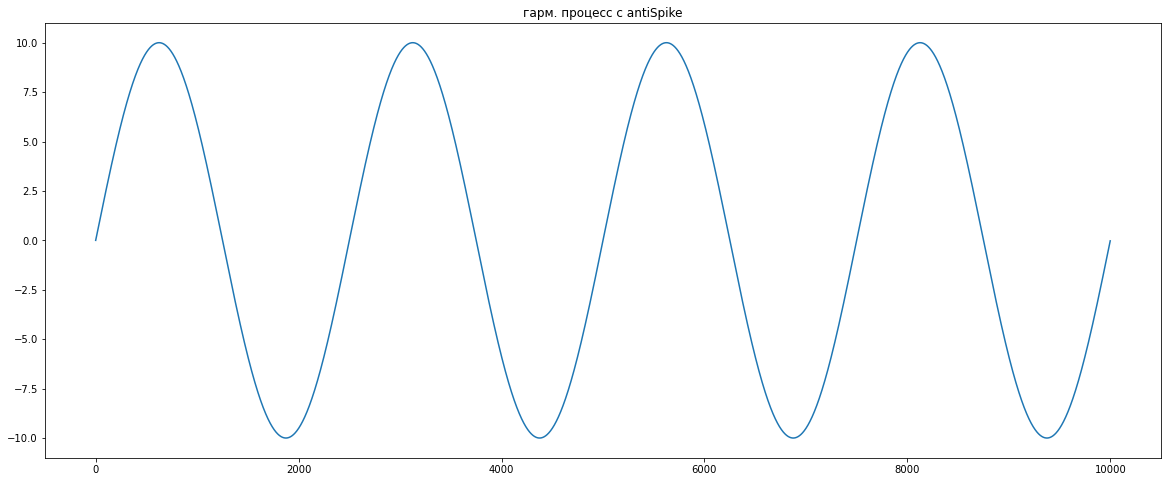

In [35]:

f=4
t=0.0001
fun1=lambda x: 10*np.sin(2*np.pi*f*x*t)
sec=spice(10000,1,5,10000,50000)
fun1=sum_graphs(fun1,sec)
plt.figure(figsize=(20, 8))
plt.plot(fun1)
plt.title("гарм. процесс с выбросом")
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(antiSpike(fun1)) 
plt.title("гарм. процесс с antiSpike")
plt.show()

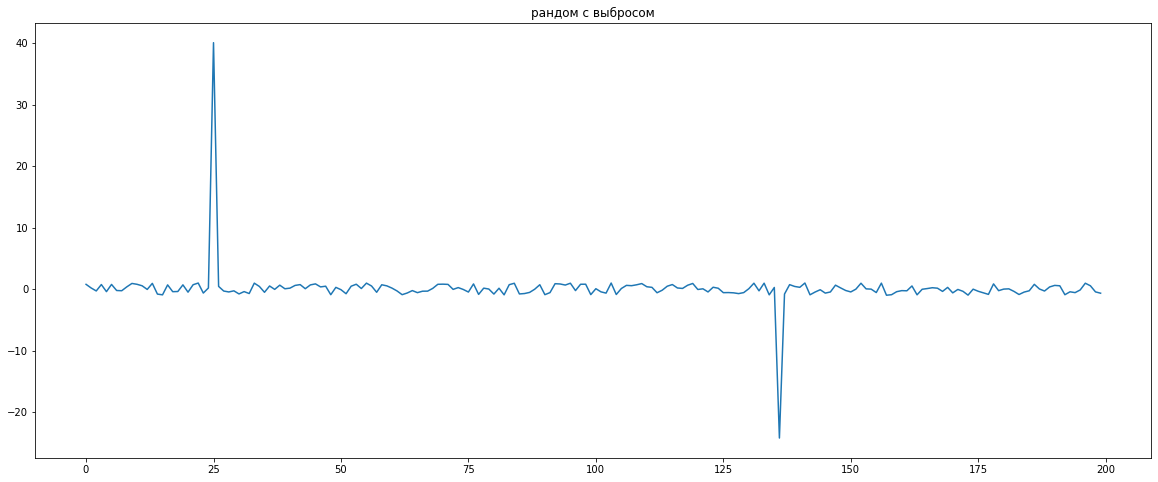

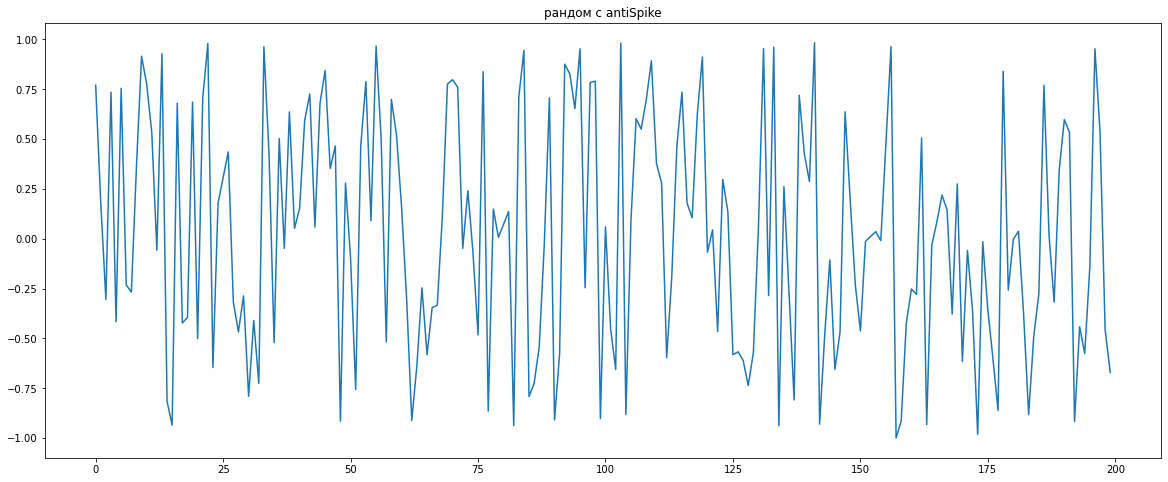

In [40]:

f=4
t=0.0001
fun1=embedRandom(200,-1,1)
sec=spice(200,1,5,10,50)
fun1=sum_graphs(fun1,sec)
plt.figure(figsize=(20, 8))
plt.plot(fun1)
plt.title("рандом с выбросом")
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(antiSpike(fun1)) 
plt.title("рандом с antiSpike")
plt.show()

In [ ]:
27.10 пара

<ipython-input-93-52cbb0a19311>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  funs=np.array([[sum_graphs(fir,sec), 0, 200,1]])
<ipython-input-93-52cbb0a19311>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res=np.array([[[], 0, 200,1]])


(0.0, 160.0)

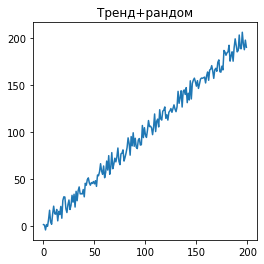

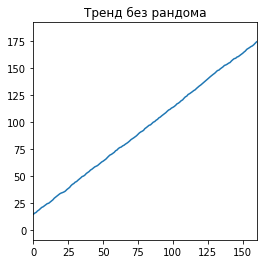

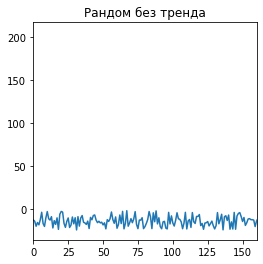

In [93]:

#чужой рандом+х
sec=embedRandom(200,-11,11)
fir = lambda x: 1*x

funs=np.array([[sum_graphs(fir,sec), 0, 200,1]])

drawing_functions(funs,1,1)
plt.title("Тренд+рандом")
L=30
res=np.array([[[], 0, 200,1]])
resT=[0]*200
for i in range(len(funs[0][0])-L):
    sum=0
    for j in range(L):
        sum= sum+funs[0][0][i+j]
    resT[i]=sum/L
res[0][0]= resT
res[0][2]=res[0][2]-L
drawing_functions(res,1,1)
plt.title("Тренд без рандома")
plt.xlim(0, 160)
tem=[-1]*200
rand= res
rand[0][0]=sum_graphs(multiplication_graphs(resT,tem),funs[0][0])
rand[0][2]=rand[0][2]-L
drawing_functions(rand,1,1)
plt.title("Рандом без тренда")
plt.xlim(0, 160)

Станд отколен тренда: 57.73430522661548
Станд отколен рандома: 66.49092971547543
Станд отколен рандома+тренда: 86.23917137387537


Text(0.5, 1.0, 'График отношения откл.1/откл.𝑖 от i')

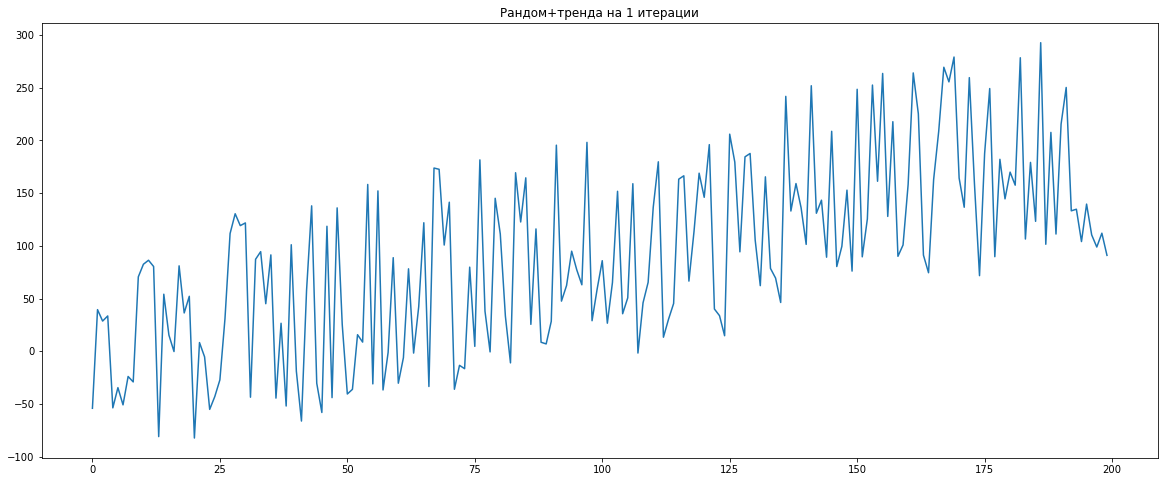

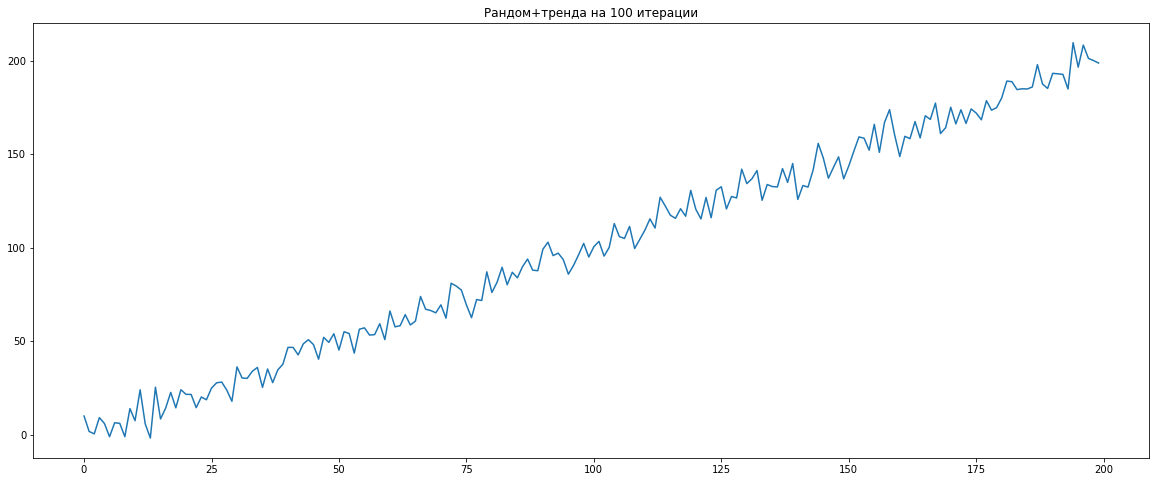

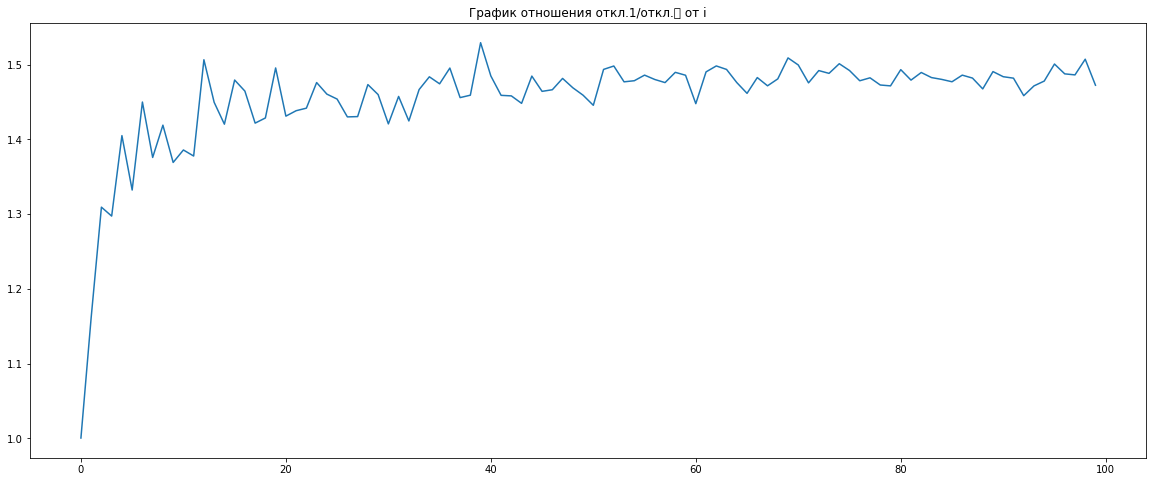

In [119]:

fun= lambda x: 1*x
temp= [0]*200
fun=sum_graphs(fir,temp)
print("Станд отколен тренда: "+str(standard_deviation(fun)))
sec=embedRandom(200,-111,111)
print("Станд отколен рандома: "+str(standard_deviation(sec)))
fun= sum_graphs(fun,sec)
print("Станд отколен рандома+тренда: "+str(standard_deviation(fun)))
soot1=standard_deviation(fun)
soot=[]

x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.plot(fun)
plt.title("Рандом+тренда на 1 итерации")
for j in range(100):
    
    num=(j+1)*1
    resRan=[0]*200
    res=[0]*200
    for i in range(num):
        fir= lambda x: 1*x
        fun=sum_graphs(fir,temp)
        sec=embedRandom(200,-111,111)
        resRan=sum_graphs(sec,resRan)
        fun= sum_graphs(fun,sec)
        res=sum_graphs(res,fun)
    resRan=multiplication_graphs(resRan,[1/num]*200)
    res=multiplication_graphs(res,[1/num]*200)
    #print("Станд отколен рандома Х"+str(num)+": "+str(standard_deviation(resRan)))
    #print("Станд отколен рандома+гарм. процесс Х"+str(num)+": "+str(standard_deviation(res)))
    soot.append(soot1/standard_deviation(res))
x = np.arange(0.0, 1,0.001)

plt.figure(figsize=(20, 8))
plt.plot(res)
plt.title("Рандом+тренда на 100 итерации")
#print(soot)
x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
plt.plot(soot)
plt.title("График отношения откл.1/откл.𝑖 от i")

<Figure size 1440x576 with 0 Axes>

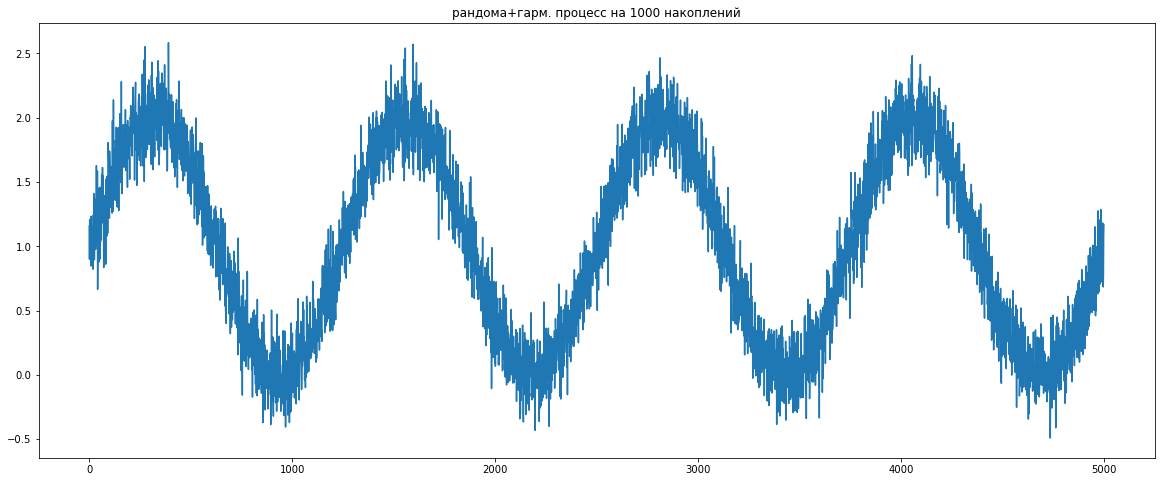

<Figure size 1440x576 with 0 Axes>

In [131]:
f=4
t=1/(f*32)
t=0.0002
T=t*1000
fir=lambda x: 1*np.sin(2*np.pi*f*x*t)
fun=bias_lambda(fir,1,5000)
#print("Станд отколен гар. процесса: "+str(standard_deviation(fun)))
sec=embedRandom(5000,-10,10)
#print("Станд отколен рандома: "+str(standard_deviation(sec)))
fun= sum_graphs(fun,sec)
#print("Станд отколен рандома+гарм. процесс: "+str(standard_deviation(fun)))
for j in range(1):
    num=1000
    resRan=[0]*5000
    res=[0]*5000
    for i in range(num):
        fir=lambda x: 1*np.sin(2*np.pi*f*x*t)
        fun=bias_lambda(fir,1,5000)
        sec=embedRandom(5000,-10,10)
        resRan=sum_graphs(sec,resRan)
        fun= sum_graphs(fun,sec)
        res=sum_graphs(res,fun)
    resRan=multiplication_graphs(resRan,[1/num]*5000)
    res=multiplication_graphs(res,[1/num]*5000)
    #print("Станд отколен рандома Х"+str(num)+": "+str(standard_deviation(resRan)))
    #print("Станд отколен рандома+гарм. процесс Х"+str(num)+": "+str(standard_deviation(res)))
    x = np.arange(0.0, 1,0.001)
    plt.figure(figsize=(20, 8))
    plt.plot(res)
    plt.title("рандома+гарм. процесс на "+str(num)+" накоплений")

x = np.arange(0.0, 1,0.001)
plt.figure(figsize=(20, 8))
##plt.plot(fun)